SMOTE using refined labels

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import os, pickle, itertools
import numpy as np
import pandas as pd

import smote_variants as sv

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import utils
from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.inspection import permutation_importance
import sklearn.inspection as ip

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
oversampler= sv.MulticlassOversampling(sv.polynom_fit_SMOTE())

In [4]:
model_dt = DecisionTreeClassifier()

In [24]:
model_rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)

## site as labels

In [6]:
filepath = '/Users/bogao/DataFiles/new landscape/files/multiclass_refined_sites.pkl'
with open(filepath, 'rb') as fin:
    data = pickle.load(fin)

In [7]:
num_labels = dict([(y,x+1) for x,y in enumerate(set(data['label']))])
num_labels = np.array([num_labels[x] for x in data['label']])

In [8]:
X_samp, y_samp= oversampler.sample(data['data'], num_labels)

2020-07-30 17:52:39,309:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-07-30 17:52:39,462:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-07-30 17:52:39,628:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")
2020-07-30 17:52:40,253:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-07-30 17:52:40,387:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.3519528692995854, 'topology': 'star', 'random_state': None}")
2020-07-30 17:52:40,860:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-07-30 17:52:40,994:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.24914675767918087, 'topology': 'star', 'random_state': None}")
2020-07-30 17:52:41,519:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-07-30 1

In [9]:
X_samp, y_samp = utils.shuffle(X_samp, y_samp)

In [34]:
y_pred = cross_val_predict(model_rf, X_samp, y_samp, cv=10, n_jobs=-1)

In [37]:
print('Accuracy: {:.4f}'.format(metrics.accuracy_score(y_samp, y_pred)))

Accuracy: 0.8568


In [40]:
print('F1: {:.4f}'.format(metrics.f1_score(y_samp, y_pred, average='macro')))

F1: 0.8620


In [41]:
cm = metrics.confusion_matrix(y_samp, y_pred)

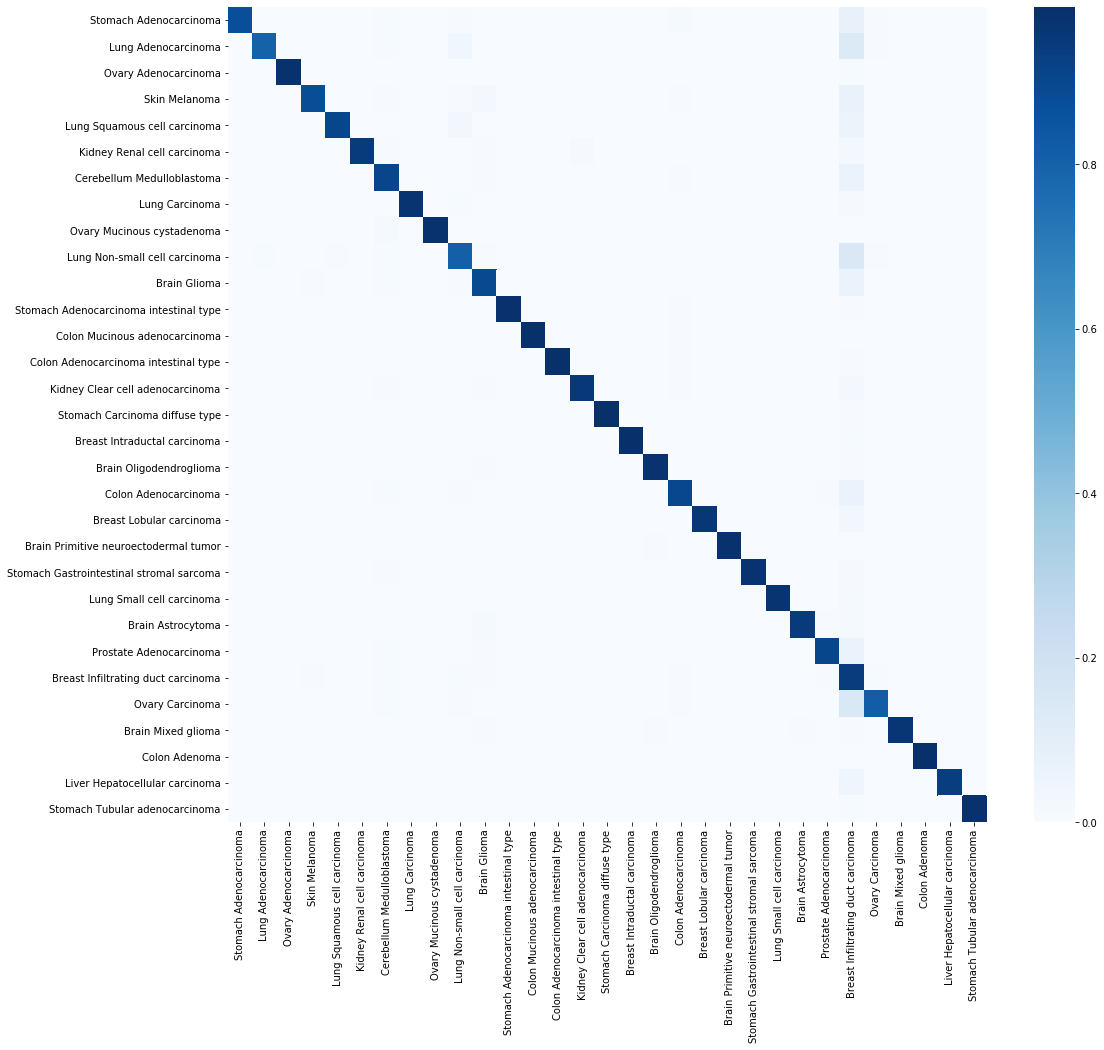

In [311]:
plt.figure(figsize=(17,15))
ax = sns.heatmap(cm / cm.sum(axis=1, keepdims=True), cmap="Blues", xticklabels=set(data['label']), yticklabels=set(data['label']))
blim, tlim = ax.get_ylim()
ax.set_ylim(blim+0.5, tlim-0.5)
plt.savefig('/Users/bogao/Desktop/projects/new landscape/Manuscript/performance-subtypes.pdf',bbox_inches='tight')

In [94]:
dict([(y,x+1) for x,y in enumerate(set(data['label']))])

{'Prostate': 1,
 'Breast': 2,
 'Skin': 3,
 'Colon': 4,
 'Liver': 5,
 'Stomach': 6,
 'Kidney': 7,
 'Cerebellum': 8,
 'Lung': 9,
 'Ovary': 10,
 'Brain': 11}

In [112]:
mcm = metrics.multilabel_confusion_matrix(y_samp, y_pred)

In [132]:
prfs = metrics.precision_recall_fscore_support(y_samp, y_pred, average=None)

In [133]:
accs = []
for m in mcm:
    acc = (m[0,0] + m[1,1])/np.sum(m)
    accs.append(acc)

In [139]:
print('Label \t Accuracy \t Precision \t Recall \t F1-score')
for i in range(len(accs)):
    print('{}:\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}'.format(i+1, accs[i], prfs[0][i], prfs[1][i], prfs[2][i]))

Label 	 Accuracy 	 Precision 	 Recall 	 F1-score
1:	0.983338	0.909105	0.914067	0.911579
2:	0.920063	0.526716	0.804882	0.636745
3:	0.984057	0.937069	0.889981	0.912918
4:	0.979734	0.882022	0.862164	0.871980
5:	0.994402	0.992355	0.946726	0.969004
6:	0.980627	0.928435	0.836552	0.880102
7:	0.988878	0.949249	0.928492	0.938756
8:	0.982752	0.925625	0.897146	0.911163
9:	0.950792	0.780809	0.767476	0.774085
10:	0.972436	0.910397	0.761094	0.829078
11:	0.976583	0.881474	0.815217	0.847052


## disease as lables

In [47]:
filepath = '/Users/bogao/DataFiles/new landscape/files/multiclass_refined_labels.pkl'
# filepath = '/Users/bogao/DataFiles/new landscape/files/multiclass_refined_genes_labels.pkl'

with open(filepath, 'rb') as fin:
    data = pickle.load(fin)

In [15]:
data['data'].shape

(22671, 163)

In [16]:
data['data'] = data['data'][:,100:120]

In [48]:
num_labels = dict([(y,x+1) for x,y in enumerate(set(data['label']))])
num_labels = np.array([num_labels[x] for x in data['label']])

In [18]:
X_samp, y_samp= oversampler.sample(data['data'], num_labels)

2020-08-13 09:04:48,504:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-08-13 09:04:48,508:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-08-13 09:04:48,511:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")
2020-08-13 09:04:48,540:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-08-13 09:04:48,542:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.4072715842414082, 'topology': 'star', 'random_state': None}")
2020-08-13 09:04:48,572:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-08-13 09:04:48,576:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.257903712449167, 'topology': 'star', 'random_state': None}")
2020-08-13 09:04:48,606:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-08-13 09:0

In [19]:
X_samp, y_samp = utils.shuffle(X_samp, y_samp)

In [25]:
y_pred = cross_val_predict(model_rf, X_samp, y_samp, cv=10, n_jobs=-1)

### Overall metrics

In [262]:
print('Accuracy: {:.4f}'.format(metrics.accuracy_score(y_samp, y_pred)))
print('Precision: {:.4f}'.format(metrics.precision_score(y_samp, y_pred, average='macro')))
print('Recall: {:.4f}'.format(metrics.recall_score(y_samp, y_pred, average='macro')))
print('F1: {:.4f}'.format(metrics.f1_score(y_samp, y_pred, average='macro')))

Accuracy: 0.9408
Precision: 0.9596
Recall: 0.9403
F1: 0.9466


In [26]:
print('Accuracy: {:.4f}'.format(metrics.accuracy_score(y_samp, y_pred)))
print('Precision: {:.4f}'.format(metrics.precision_score(y_samp, y_pred, average='macro')))
print('Recall: {:.4f}'.format(metrics.recall_score(y_samp, y_pred, average='macro')))
print('F1: {:.4f}'.format(metrics.f1_score(y_samp, y_pred, average='macro')))

Accuracy: 0.8906
Precision: 0.9030
Recall: 0.8911
F1: 0.8956


### Confusion matrix

In [22]:
cm = metrics.confusion_matrix(y_samp, y_pred)

(31.0, 0.0)

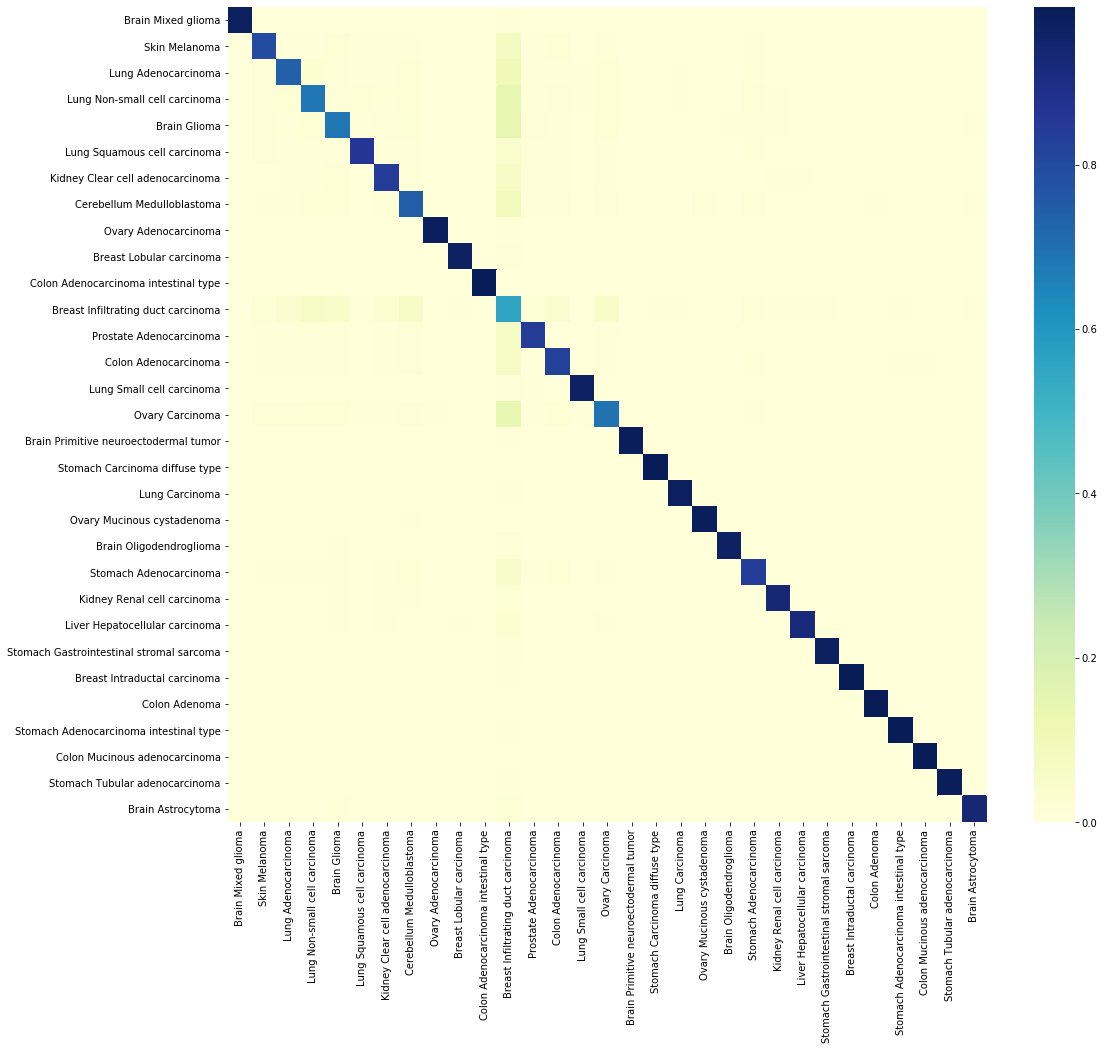

In [23]:
# ax = sns.heatmap(cm / cm.sum(axis=1, keepdims=True), cmap="Blues", xticklabels=set(data['label']), yticklabels=set(data['label']))
# blim, tlim = ax.get_ylim()
# ax.set_ylim(blim+0.5, tlim-0.5)

plt.figure(figsize=(17,15))
ax = sns.heatmap(cm / cm.sum(axis=1, keepdims=True), cmap="YlGnBu", xticklabels=set(data['label']), yticklabels=set(data['label']))
blim, tlim = ax.get_ylim()
ax.set_ylim(blim+0.5, tlim-0.5)
# plt.savefig('/Users/bogao/Desktop/projects/new landscape/Manuscript/performance-subtypes.pdf',bbox_inches='tight')

In [265]:
num2label = dict([(x+1,y) for x,y in enumerate(set(data['label']))])

### Individual metrics

In [266]:
mcm = metrics.multilabel_confusion_matrix(y_samp, y_pred)

In [267]:
prfs = metrics.precision_recall_fscore_support(y_samp, y_pred, average=None)

In [268]:
accs = []
for m in mcm:
    acc = (m[0,0] + m[1,1])/np.sum(m)
    accs.append(acc)

In [269]:
mt = pd.DataFrame({'Label':list(num2label.values()), 'Accuracy':accs, 'Precision': prfs[0], 'Recall':prfs[1], 'F1-score':prfs[2]})

In [270]:
mt.sort_values('Label')

,Label,Accuracy,Precision,Recall,F1-score
23,Brain Astrocytoma,0.997908,0.989971,0.946350,0.967669
10,Brain Glioma,0.993304,0.908359,0.896485,0.902383
27,Brain Mixed glioma,0.998988,0.996930,0.971942,0.984277
17,Brain Oligodendroglioma,0.998756,0.985344,0.976056,0.980678
20,Brain Primitive neuroectodermal tumor,0.999402,0.997105,0.984190,0.990606
25,Breast Infiltrating duct carcinoma,0.961059,0.468121,0.944847,0.626061
16,Breast Intraductal carcinoma,0.999719,1.000000,0.991370,0.995666
19,Breast Lobular carcinoma,0.998756,0.996638,0.964217,0.980160
6,Cerebellum Medulloblastoma,0.993218,0.872397,0.913199,0.892332
18,Colon Adenocarcinoma,0.994109,0.901032,0.903226,0.902128


## Organ label from disease

In [271]:
label2num = dict([(y, x+1) for x,y in enumerate(set(data['label']))])

In [272]:
organs = []
for i in set(data['label']):
    organs.append(i.split(' ')[0])

In [273]:
organ2num = dict([(y, x+1) for x,y in enumerate(set(organs))])

In [274]:
organ2num

{'Prostate': 1,
 'Breast': 2,
 'Skin': 3,
 'Colon': 4,
 'Stomach': 5,
 'Liver': 6,
 'Kidney': 7,
 'Cerebellum': 8,
 'Lung': 9,
 'Ovary': 10,
 'Brain': 11}

In [275]:
label2organ = {}
for k,v in label2num.items():
    label2organ[v] = organ2num[k.split(' ')[0]]

In [276]:
y_samp_org = [label2organ[x] for x in y_samp]

In [277]:
y_pred_org = [label2organ[x] for x in y_pred]

### Overall metrics

In [278]:
print('Accuracy: {:.4f}'.format(metrics.accuracy_score(y_samp_org, y_pred_org)))
print('Precision: {:.4f}'.format(metrics.precision_score(y_samp_org, y_pred_org, average='macro')))
print('Recall: {:.4f}'.format(metrics.recall_score(y_samp_org, y_pred_org, average='macro')))
print('F1: {:.4f}'.format(metrics.f1_score(y_samp_org, y_pred_org, average='macro')))

Accuracy: 0.9482
Precision: 0.9494
Recall: 0.9386
F1: 0.9417


### Confusion matrix

In [312]:
cm = metrics.confusion_matrix(y_samp_org, y_pred_org)

In [1]:
sns.set(font_scale = 2)
plt.figure(figsize=(17,15))
ax = sns.heatmap(cm / cm.sum(axis=1, keepdims=True), cmap="Blues", xticklabels=set(organs), yticklabels=set(organs))
blim, tlim = ax.get_ylim()
ax.set_ylim(blim+0.5, tlim-0.5)
plt.yticks(rotation=0)
# plt.savefig('/Users/bogao/Desktop/projects/new landscape/Manuscript/performance-organs.pdf',bbox_inches='tight')

NameError: name 'sns' is not defined

In [281]:
mcm = metrics.multilabel_confusion_matrix(y_samp_org, y_pred_org)

In [282]:
prfs = metrics.precision_recall_fscore_support(y_samp_org, y_pred_org, average=None)

In [283]:
accs = []
for m in mcm:
    acc = (m[0,0] + m[1,1])/np.sum(m)
    accs.append(acc)

In [284]:
mt = pd.DataFrame({'Label':list(set(organs)), 'Accuracy':accs, 'Precision': prfs[0], 'Recall':prfs[1], 'F1-score':prfs[2]})

In [285]:
mt.sort_values('Label')

,Label,Accuracy,Precision,Recall,F1-score
10,Brain,0.992065,0.986071,0.965425,0.975639
1,Breast,0.962486,0.731225,0.981311,0.838008
7,Cerebellum,0.993218,0.872397,0.913199,0.892332
3,Colon,0.993889,0.979269,0.972392,0.975818
6,Kidney,0.996420,0.986033,0.958969,0.972313
5,Liver,0.998012,0.997954,0.939161,0.967665
8,Lung,0.984320,0.985975,0.913015,0.948093
9,Ovary,0.991492,0.983085,0.928253,0.954882
0,Prostate,0.995402,0.953693,0.906841,0.929677
2,Skin,0.995231,0.968544,0.882210,0.923363


## Investigating mis-classifications

In [231]:
mcm

array([[[158071,    555],
        [   616,   4725]],

       [[158120,    999],
        [   898,   3950]],

       [[158595,     44],
        [    93,   5235]],

       [[157996,    631],
        [   675,   4665]],

       [[158525,    262],
        [   443,   4737]],

       [[158658,    141],
        [   278,   4890]],

       [[157846,   1075],
        [   601,   4445]],

       [[158681,     42],
        [   135,   5109]],

       [[158659,     43],
        [    96,   5169]],

       [[157538,   1254],
        [  1132,   4043]],

       [[157471,    835],
        [   756,   4905]],

       [[158626,     29],
        [    80,   5232]],

       [[158683,     14],
        [    61,   5209]],

       [[158656,     11],
        [    53,   5247]],

       [[158036,    351],
        [   368,   5212]],

       [[158652,     14],
        [    56,   5245]],

       [[158626,     11],
        [    52,   5278]],

       [[158553,    110],
        [   155,   5149]],

       [[158371,    667],
  

### Breast Infiltrating duct carcinoma

In [286]:
code = label2num['Breast Infiltrating duct carcinoma']

#### False negative

In [287]:

wrongs = []
for t, p in zip(y_samp, y_pred):
    if t == code and p != code:
        wrongs.append(p)

In [288]:
pd.DataFrame(np.unique([num2label[x] for x in wrongs], return_counts=True)).transpose()

,0,1
0,Brain Glioma,22
1,Breast Lobular carcinoma,16
2,Cerebellum Medulloblastoma,49
3,Colon Adenocarcinoma,40
4,Kidney Clear cell adenocarcinoma,18
5,Liver Hepatocellular carcinoma,1
6,Lung Adenocarcinoma,7
7,Lung Non-small cell carcinoma,48
8,Ovary Carcinoma,54
9,Ovary Mucinous cystadenoma,1


#### False positive

In [229]:
wrongs = []
for t, p in zip(y_samp, y_pred):
    if t != code and p == code:
        wrongs.append(t)

In [230]:
pd.DataFrame(np.unique([num2label[x] for x in wrongs], return_counts=True)).transpose()

,0,1
0,Brain Astrocytoma,57
1,Brain Glioma,191
2,Brain Mixed glioma,17
3,Brain Oligodendroglioma,18
4,Brain Primitive neuroectodermal tumor,6
5,Breast Intraductal carcinoma,35
6,Breast Lobular carcinoma,141
7,Cerebellum Medulloblastoma,214
8,Colon Adenocarcinoma,228
9,Colon Adenocarcinoma intestinal type,19


### Lung Non-small cell carcinoma

In [218]:
code = label2num['Lung Non-small cell carcinoma']

In [219]:
wrongs = []
for t, p in zip(y_samp, y_pred):
    if t == code and p != code:
        wrongs.append(p)

In [220]:
pd.DataFrame(np.unique([num2label[x] for x in wrongs], return_counts=True)).transpose()

,0,1
0,Brain Astrocytoma,3
1,Brain Glioma,46
2,Brain Oligodendroglioma,5
3,Breast Infiltrating duct carcinoma,453
4,Cerebellum Medulloblastoma,93
5,Colon Adenocarcinoma,35
6,Colon Adenocarcinoma intestinal type,1
7,Colon Adenoma,1
8,Kidney Clear cell adenocarcinoma,24
9,Kidney Renal cell carcinoma,12


## Feature importance

In [289]:
rf = model_rf.fit(X_samp, y_samp)

In [290]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [291]:
fi = rf.feature_importances_

In [292]:
amp_genes =  pd.read_csv('/Users/bogao/DataFiles/Data/genome/high_amp_genes.tsv', sep='\t')

del_genes = pd.read_csv('/Users/bogao/DataFiles/Data/genome/high_del_genes.tsv', sep='\t')


In [293]:
amp_genes = amp_genes.assign(type='amp')
del_genes = del_genes.assign(type='del')

In [294]:
genes = pd.merge(amp_genes, del_genes, how='outer')

In [295]:
genes = genes.assign(score = fi)

In [296]:
genes.nlargest(20,'score')

,gene_id,name,chr,start,end,symbol,band,type,score
1061,ENSG00000176269,p23.3,8,166049,167043,OR4F21,8p23.3,amp,0.008717
1868,ENSG00000211979,q32.33,14,106874583,106875071,IGHV7-81,14q32.33,amp,0.006827
2857,ENSG00000188403,q11.1,15,19964666,19965101,IGHV1OR15-9,15q11.1,del,0.006571
2858,ENSG00000259490,q11.1,15,19987656,19988117,IGHV3OR15-7,15q11.1,del,0.004861
2445,ENSG00000180104,p15.33,5,443175,471937,EXOC3,5p15.33,del,0.004326
2447,ENSG00000112877,p15.33,5,612340,667168,CEP72,5p15.33,del,0.004313
2446,ENSG00000066230,p15.33,5,470456,524449,SLC9A3,5p15.33,del,0.003881
2440,ENSG00000164366,p15.33,5,196868,218153,CCDC127,5p15.33,del,0.003712
2441,ENSG00000073578,p15.33,5,218241,257082,SDHA,5p15.33,del,0.003693
2442,ENSG00000249915,p15.33,5,271621,314974,PDCD6,5p15.33,del,0.003657


## tests

In [2]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3)

In [12]:
splits = sss.split(X_samp, y_samp)

In [15]:
for train_index, test_index in splits:

    X_train, X_test = X_samp[train_index], X_samp[test_index]
    y_train, y_test = y_samp[train_index], y_samp[test_index]

In [17]:
m = model_rf.fit(X_train, y_train)

/Users/bogao/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
y_pred = m.predict(X_test)

In [19]:
metrics.f1_score(y_test, y_pred, average='macro')

0.8596770765971514

In [47]:
cm = metrics.confusion_matrix(y_test, y_pred, normalize='true')

TypeError: confusion_matrix() got an unexpected keyword argument 'normalize'

In [25]:
cm

array([[1842,   52,   20,    3,  240,   24,   11,   12,    8,   15,   22],
       [ 136, 1428,    5,    5,  167,   18,    2,   13,   15,    7,    2],
       [  52,   14, 1745,    0,   37,    5,    4,    5,    3,    0,   15],
       [  16,    7,    1, 1816,   44,    0,    1,    0,    5,    2,    0],
       [ 262,   84,   22,    8, 1297,   18,   13,   10,   18,   16,   34],
       [  50,   22,   13,    0,   87, 1802,    6,    7,    9,    3,   20],
       [  45,   16,    7,    1,   63,    9, 1745,    3,    6,    2,   27],
       [  88,   28,    8,    0,  103,   19,    7, 1432,   35,    2,   18],
       [  64,   27,    9,    4,   90,   20,   15,   12, 1381,    4,   13],
       [  60,   15,    3,    4,   80,    7,    4,    5,   13, 1686,   45],
       [  72,   25,   21,    6,   99,   26,   15,    9,   17,   15, 1323]])

In [42]:
np.sum(cm, axis=1)

array([2249, 1798, 1880, 1892, 1782, 2019, 1924, 1740, 1639, 1922, 1628])

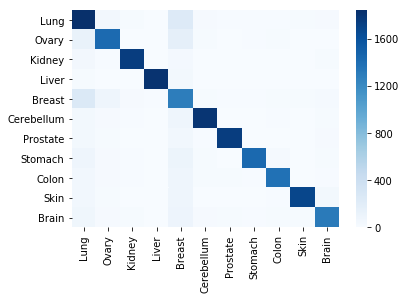

In [44]:
sns.heatmap(cm, cmap="Blues", xticklabels=set(data['label']), yticklabels=set(data['label']))

In [43]:
dict([(y,x+1) for x,y in enumerate(set(data['label']))])

{'Lung': 1,
 'Ovary': 2,
 'Kidney': 3,
 'Liver': 4,
 'Breast': 5,
 'Cerebellum': 6,
 'Prostate': 7,
 'Stomach': 8,
 'Colon': 9,
 'Skin': 10,
 'Brain': 11}

In [34]:
np.unique(data['label'], return_counts=True)

(array(['Brain', 'Breast', 'Cerebellum', 'Colon', 'Kidney', 'Liver',
        'Lung', 'Ovary', 'Prostate', 'Skin', 'Stomach'], dtype='<U10'),
 array([2714, 5940, 1682, 1821, 1253,  371, 3748, 1998,  916, 1068, 1160]))

In [139]:
metrics.accuracy_score(labels_test, y_predict)

0.17937219730941703

In [15]:
data['data'].shape

(22671, 3029)

In [27]:
import sklearn.datasets as datasets

In [28]:
dataset= datasets.load_breast_cancer()

In [49]:
d = {}
d['data'] = data['data']
d['target'] = np.array(num_labels)
d['name'] = np.array(set(data['label']))

In [50]:
res = sv.cross_validate(d, oversampler, model_rf)

2020-08-13 10:13:29,272:INFO:The problem is not binary
2020-08-13 10:13:29,299:INFO:Executing fold
2020-08-13 10:13:29,591:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-08-13 10:13:29,707:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-08-13 10:13:29,800:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")
2020-08-13 10:13:30,295:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-08-13 10:13:30,417:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.40725700812156146, 'topology': 'star', 'random_state': None}")
2020-08-13 10:13:30,839:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-08-13 10:13:30,969:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.25789257892578926, 'topology': 'star', 'random_state': None}")
2020

2020-08-13 10:20:46,302:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-08-13 10:20:46,327:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")
2020-08-13 10:20:46,544:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-08-13 10:20:46,601:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.40725700812156146, 'topology': 'star', 'random_state': None}")
2020-08-13 10:20:46,860:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-08-13 10:20:46,933:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.25789257892578926, 'topology': 'star', 'random_state': None}")
2020-08-13 10:20:47,241:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-08-13 10:20:47,333:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.18979409131602507, 'topolo

2020-08-13 10:28:02,356:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-08-13 10:28:02,411:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.4072812991094814, 'topology': 'star', 'random_state': None}")
2020-08-13 10:28:02,667:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-08-13 10:28:02,753:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.2579111329726185, 'topology': 'star', 'random_state': None}")
2020-08-13 10:28:03,043:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-08-13 10:28:03,143:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.18976011457214464, 'topology': 'star', 'random_state': None}")
2020-08-13 10:28:03,546:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-08-13 10:28:03,669:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.15068493150

2020-08-13 10:35:21,405:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-08-13 10:35:21,479:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.2579111329726185, 'topology': 'star', 'random_state': None}")
2020-08-13 10:35:21,770:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-08-13 10:35:21,861:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.18976011457214464, 'topology': 'star', 'random_state': None}")
2020-08-13 10:35:22,179:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-08-13 10:35:22,297:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.1506450856204551, 'topology': 'star', 'random_state': None}")
2020-08-13 10:35:22,729:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-08-13 10:35:22,854:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.135797754525

2020-08-13 10:42:48,301:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-08-13 10:42:48,393:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.18976011457214464, 'topology': 'star', 'random_state': None}")
2020-08-13 10:42:48,708:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-08-13 10:42:48,831:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.1506450856204551, 'topology': 'star', 'random_state': None}")
2020-08-13 10:42:49,260:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-08-13 10:42:49,385:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.13579775452531886, 'topology': 'star', 'random_state': None}")
2020-08-13 10:42:49,795:INFO:MulticlassOversampling: Sampling minority class with label: 1
2020-08-13 10:42:49,926:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.11908391994

2020-08-13 10:50:15,112:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-08-13 10:50:15,236:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.15067336117498006, 'topology': 'star', 'random_state': None}")
2020-08-13 10:50:15,663:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-08-13 10:50:15,802:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.13582368893472366, 'topology': 'star', 'random_state': None}")
2020-08-13 10:50:16,210:INFO:MulticlassOversampling: Sampling minority class with label: 1
2020-08-13 10:50:16,350:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.11910710230037962, 'topology': 'star', 'random_state': None}")
2020-08-13 10:50:16,838:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-08-13 10:50:16,994:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.1066392148

2020-08-13 10:57:33,245:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-08-13 10:57:33,382:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.13582368893472366, 'topology': 'star', 'random_state': None}")
2020-08-13 10:57:33,791:INFO:MulticlassOversampling: Sampling minority class with label: 1
2020-08-13 10:57:33,931:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.11910710230037962, 'topology': 'star', 'random_state': None}")
2020-08-13 10:57:34,418:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-08-13 10:57:34,566:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.10663921480144405, 'topology': 'star', 'random_state': None}")
2020-08-13 10:57:35,099:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-08-13 10:57:35,261:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0948189637

2020-08-13 11:05:02,113:INFO:MulticlassOversampling: Sampling minority class with label: 1
2020-08-13 11:05:02,252:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.1191124951342935, 'topology': 'star', 'random_state': None}")
2020-08-13 11:05:02,743:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-08-13 11:05:02,888:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.10664335664335664, 'topology': 'star', 'random_state': None}")
2020-08-13 11:05:03,422:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-08-13 11:05:03,581:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.09482262943426414, 'topology': 'star', 'random_state': None}")
2020-08-13 11:05:04,132:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-08-13 11:05:04,307:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0877043673

2020-08-13 11:12:26,779:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-08-13 11:12:26,941:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.10664335664335664, 'topology': 'star', 'random_state': None}")
2020-08-13 11:12:27,541:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-08-13 11:12:27,711:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.09482262943426414, 'topology': 'star', 'random_state': None}")
2020-08-13 11:12:28,283:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-08-13 11:12:28,462:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.08768393469058658, 'topology': 'star', 'random_state': None}")
2020-08-13 11:12:29,062:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-08-13 11:12:29,262:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.083267505

2020-08-13 11:19:38,428:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-08-13 11:19:38,590:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.09482262943426414, 'topology': 'star', 'random_state': None}")
2020-08-13 11:19:39,146:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-08-13 11:19:39,321:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.08768393469058658, 'topology': 'star', 'random_state': None}")
2020-08-13 11:19:39,875:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-08-13 11:19:40,061:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.08326750521561241, 'topology': 'star', 'random_state': None}")
2020-08-13 11:19:40,653:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-08-13 11:19:40,859:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.07829306

2020-08-13 11:27:03,486:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-08-13 11:27:03,664:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.08770161290322581, 'topology': 'star', 'random_state': None}")
2020-08-13 11:27:04,220:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-08-13 11:27:04,423:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.08328437430360001, 'topology': 'star', 'random_state': None}")
2020-08-13 11:27:05,069:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-08-13 11:27:05,276:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.07830901414710022, 'topology': 'star', 'random_state': None}")
2020-08-13 11:27:05,943:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-08-13 11:27:06,154:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.07265088

2020-08-13 11:34:27,646:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-08-13 11:34:27,833:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.08328437430360001, 'topology': 'star', 'random_state': None}")
2020-08-13 11:34:28,426:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-08-13 11:34:28,628:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.07829194674369942, 'topology': 'star', 'random_state': None}")
2020-08-13 11:34:29,286:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-08-13 11:34:29,499:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.07265088636130751, 'topology': 'star', 'random_state': None}")
2020-08-13 11:34:30,187:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-08-13 11:34:30,412:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.06763139

2020-08-13 11:41:53,774:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-08-13 11:41:53,971:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.07829306674072017, 'topology': 'star', 'random_state': None}")
2020-08-13 11:41:54,625:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-08-13 11:41:54,841:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.07265183465091263, 'topology': 'star', 'random_state': None}")
2020-08-13 11:41:55,533:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-08-13 11:41:55,763:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.06763223782207714, 'topology': 'star', 'random_state': None}")
2020-08-13 11:41:56,433:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-08-13 11:41:56,671:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0642269

2020-08-13 11:49:20,199:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-08-13 11:49:20,410:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.07265183465091263, 'topology': 'star', 'random_state': None}")
2020-08-13 11:49:21,106:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-08-13 11:49:21,333:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.06761746295856112, 'topology': 'star', 'random_state': None}")
2020-08-13 11:49:22,031:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-08-13 11:49:22,279:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.06422695789582503, 'topology': 'star', 'random_state': None}")
2020-08-13 11:49:23,012:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-08-13 11:49:23,279:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.06041104

2020-08-13 11:56:48,099:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-08-13 11:56:48,358:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.06761746295856112, 'topology': 'star', 'random_state': None}")
2020-08-13 11:56:49,094:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-08-13 11:56:49,340:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.06422695789582503, 'topology': 'star', 'random_state': None}")
2020-08-13 11:56:50,084:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-08-13 11:56:50,352:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.06041104421839319, 'topology': 'star', 'random_state': None}")
2020-08-13 11:56:51,162:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-08-13 11:56:51,438:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.05710788

In [51]:
res

,value
runtime,38.5825
sampler,MulticlassOversampling
classifier,RandomForestClassifier
sampler_parameters,{'oversampler': <smote_variants._smote_variant...
classifier_parameters,"{'bootstrap': True, 'class_weight': None, 'cri..."
db_size,22671
db_n_attr,3029
db_n_classes,31
acc,0.562187
confusion_matrix,"[[13, 2, 0, 12, 79, 0, 21, 5, 0, 0, 0, 120, 64..."


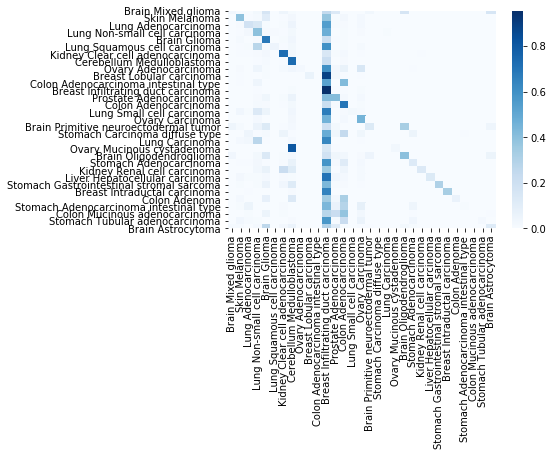

In [54]:
sns.heatmap(res['value']['confusion_matrix']/res['value']['confusion_matrix'].sum(axis=1, keepdims=True), cmap="Blues", xticklabels=set(data['label']), yticklabels=set(data['label']))

/Users/bogao/anaconda3/envs/smoten/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


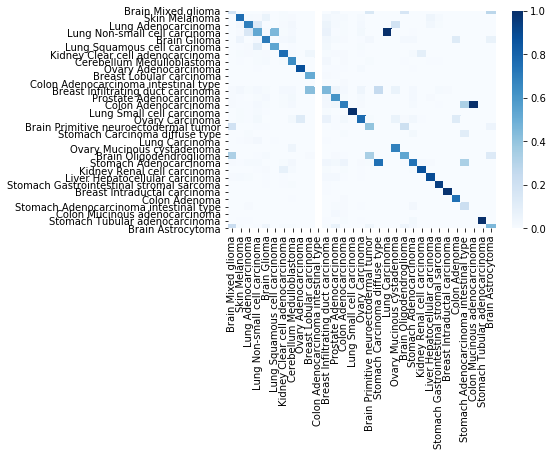

In [60]:
sns.heatmap(res['value']['confusion_matrix']/res['value']['confusion_matrix'].sum(axis=0, keepdims=True), cmap="Blues", xticklabels=set(data['label']), yticklabels=set(data['label']))

In [61]:
res['value']['confusion_matrix'].sum(axis=0, keepdims=True)

array([[   73,  1658,   966,  3902,  5446,   145,  2677,  5759,     8,
           70,     0, 35510,  1879,  4879,    12,  3129,    99,     4,
           47,    16,   493,   381,   145,   160,   172,    82,    16,
            9,     3,     5,   268]])

In [59]:
np.max(res['value']['confusion_matrix'])

16197

In [56]:
cm.sum(axis=1)

array([5346, 5340, 4848, 5175, 5661, 5180, 5580, 5046, 5328, 5226, 5300,
       5657, 5496, 4929, 5270, 5310, 5250, 5301, 5244, 5265, 5304, 5341,
       5168, 5194, 5250, 5330, 5292, 5312, 5270, 5330, 5424])

In [57]:
cm.sum(axis=0)

array([5325, 4997, 4222, 4654, 5089, 4832, 5314, 5064, 5337, 5225, 5323,
       9375, 5256, 4966, 5264, 4719, 5268, 5333, 5254, 5395, 5284, 5058,
       5114, 4963, 5229, 5376, 5357, 5391, 5380, 5316, 5287])